## 3) Read the image given and Call the image I_orig.
    (a) Use Canny Edge Detector to obtain the Edge map, I_Edge. 
    (b) Find the Fourier Transform of I_orig, call it F_orig. Find the Fourier Transform of I_Edge, call it         F_edge.What do you conclude ?

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

### 1. Reading an image

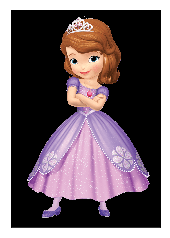

In [2]:
I_orig = cv2.imread('./images/3.png')
plt.imshow(cv2.cvtColor(I_orig,cv2.COLOR_RGB2BGR)), plt.xticks([]), plt.yticks([])
plt.show()

### 2. Applying Canny Edge detector to obatain an edge map of an image

Text(0.5,1,'Edge Map')

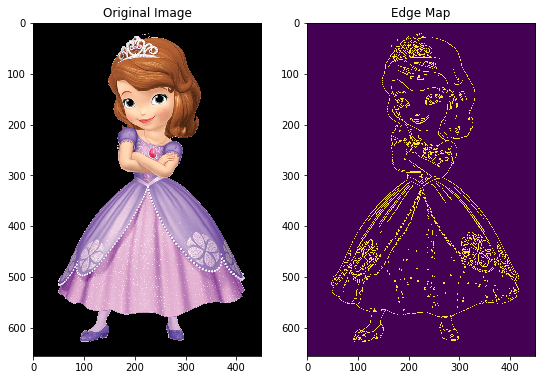

In [3]:
I_orig_gray = cv2.cvtColor(I_orig,cv2.COLOR_BGR2GRAY)
I_Edge = cv2.Canny(I_orig_gray,100,200)

# plotting
f, axarr = plt.subplots(nrows = 1, ncols = 2,figsize = (9,9))
axarr[0].imshow(cv2.cvtColor(I_orig,cv2.COLOR_RGB2BGR)); axarr[0].set_title('Original Image')
axarr[1].imshow(I_Edge) ; axarr[1].set_title('Edge Map')

### Function to calculate fourier transform of an image : it ll return fft_shift of an img 

In [4]:
def fft(img):
    fft = np.fft.fft2(img)           
    fft_shift = np.fft.fftshift(fft)
    
    return fft_shift 

def mag_ph(fft_img):
    fft_shift = fft_img
    magnitude_spectrum = 20*np.log(0.00001+np.abs(fft_shift))
    phase_spectrum = np.angle(fft_shift)
    
    return magnitude_spectrum, phase_spectrum            # returning mag_spec , pow_spec

### 3. calculating fourier of an image

In [5]:
# calculating fourier of both 

F_orig = fft(I_orig_gray)
F_Edge = fft(I_Edge)

#F_orig.shape
#F_Edge.shape

### 4. Plotting fourier transform of both images to conclude the difference 

Text(0.5,1,'Fourier of an Edge map')

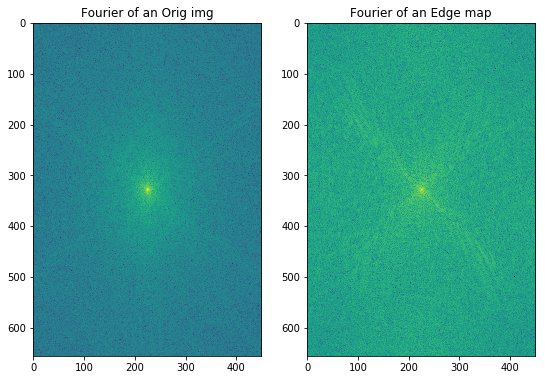

In [6]:
# plotting fourier transform of an image
F_orig_img = (np.log(np.abs(F_orig)))
F_Edge_img = np.log(np.abs(F_Edge))

#plotting 
f, axarr = plt.subplots(nrows = 1, ncols = 2,figsize = (9,9))
axarr[0].imshow(F_orig_img ); axarr[0].set_title('Fourier of an Orig img')
axarr[1].imshow(F_Edge_img ) ; axarr[1].set_title('Fourier of an Edge map')

## Observations : 

- one observation is there are abrupt changes in magnitude of fourier transform of original image
 but see fourier transform of edge map image : magnitude of the same shows no abrupt changes
 and it contains only edges , the high freqn components are missing in the middle as u cn see
 so less intensity at the mid of the image
 
- other observation is that frequency components are almost similar thorughout the image 